In [16]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
data_folder = '/home/vbe/cdocs/kaggle/tps0122/data/'
train_data = pd.read_csv(data_folder + 'train.csv', index_col = 'row_id')
test_data = pd.read_csv(data_folder + 'test.csv', index_col = 'row_id')
sample_submission = pd.read_csv(data_folder + 'sample_submission.csv', index_col = 'row_id')

In [11]:
train_data.head(5)

,date,country,store,product,num_sold
row_id,,,,,
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [13]:
train_data['country'].unique()

array(['Finland', 'Norway', 'Sweden'], dtype=object)

In [14]:
train_data['store'].unique()

array(['KaggleMart', 'KaggleRama'], dtype=object)

In [15]:
train_data['product'].unique()

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

In [37]:
def date_transfortm(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['is_weekend'] = df['date'].dt.dayofweek > 4 #True for Sunday and Saturday
    return df

In [38]:
train_data_dates = date_transfortm(train_data)

In [40]:
train_data_dates.head(5)

,date,country,store,product,num_sold,year,month,day,day_of_week,is_weekend
row_id,,,,,,,,,,
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,1,3,False
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,1,3,False
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1,3,False
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,1,3,False
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,1,3,False


<AxesSubplot:xlabel='date', ylabel='num_sold'>

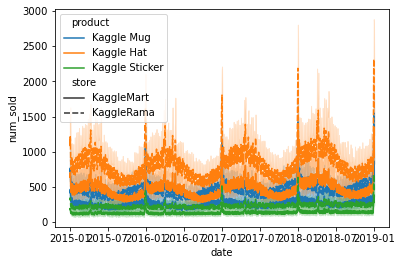

In [44]:
sns.lineplot(data=train_data_dates, x='date', y = 'num_sold', hue='product', style = 'store')